[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89. -90. -89. -88. -87. -86. -85. -84. -83.
 -82. -81. -80. -79. -78. -77. -76. -75. -74. -73. -72. -71. -70. -69.
 -68. -67. -66. -65. -64. -63. -62. -61. -60. -59. -58. -57. -56. -55.
 -54. -53. -52. -51. -50. -49. -48. -47. -46. -45. -44. -43. -42. -41.
 -40. -39. -38. -37. -36. -35. -34. -33. -32. -31. -30. -29. -28. -27.
 -26. -25. -24. -23. -22. -21. -20. -19. -18. -17. -16. -15. -14. -13.
 -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.]


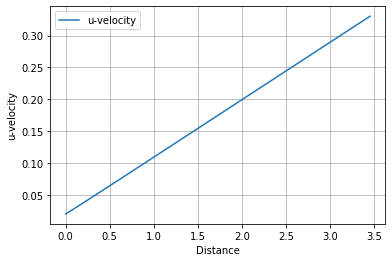

In [1]:
#Bugers equation (two wave number)
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import csv

f = open('Burgers nu = 0.1.plt', 'w', encoding='utf-8', newline='')
#wr = plt.writer(f)

wave = np.zeros([180],dtype = np.float64)
x = np.zeros([180],dtype = np.float64)
u_old = np.zeros([180],dtype = np.float64)
u_new = np.zeros([180],dtype = np.float64)
U_old = np.zeros([180],dtype = np.complex128)
U_new = np.zeros([180],dtype = np.complex128)
w_old = np.zeros([180],dtype = np.complex128)
G_old = np.zeros([180],dtype = np.complex128)

#Discretization of Basis & Domain N
N = 180
T = 1500
nu = 0.1
Domain = 2.0*np.pi
d_t = 1/100 # delta - time
d_x = Domain/N


#Initial condition (Discretization)
for i in range (N):
    x[i] = i*d_x  

    if(i<N//2):
        wave[i] = i   ##wave number
        
    elif(i>=N//2):
        wave[i] = i-N

print(wave)

#python에서는 &&가 and조건이 아니라 그냥 and라고 적으면 된다

for i in range (N):
    u_old[i] = np.sin(x[i])
        
#print(u_old)    
f.write('VARIABLES = "x", "y" \n')

for t in range(T):
    
    f.write('Zone T= "%d"\n' %t)  
    f.write('I=%d \n' %N)
    w_old = u_old**2
    U_old = np.fft.fft(u_old)  
    G_old = np.fft.fft(w_old)
    #print(G_old)

    #Initial condition (Discretization) $ Inverse Fourier
    
    #for i in range (N): # without zeropadding
    for i in range (N): # with zeropadding
        
        U_new[i] = (1-d_t/2*nu*(wave[i]**2))/(1+d_t/2*nu*(wave[i]**2))*U_old[i] - d_t*wave[i]/(1+d_t/2*nu*(wave[i]**2))*G_old[i]*1j
        
        if(i>=N//3 and i<N*2//3):
            U_new[i] = 0.0 #Zero-padding
        
    #time update     
        
    #Inverse Fourier transform
    u_old = np.real(np.fft.ifft(U_new)) #Inverse Fourier transform
    #print(u_old[i])
    
    for k in range(N):
        f.write("%d %f \n" %(k , u_old[k]))
    #U (Frequency domain), u (real domain)  



#plt.subplots(nrows=2, ncols=1) graph를 1개 이상을 보여주고 싶을때 사용한다
plt.plot(x[0:100],u_old[0:100],label='u-velocity')
#plt.plot(x[0:51],x[0:51],label='x')
plt.legend()
plt.xlabel('Distance'); plt.ylabel('u-velocity'); plt.grid()


f.close()



In [11]:
#How to put imaginary number (test)
import numpy as np

x = np.zeros([1], dtype=np.complex128)

x= 3 + 3j

print (x)

(3+3j)


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49. -50. -49. -48. -47. -46. -45.
 -44. -43. -42. -41. -40. -39. -38. -37. -36. -35. -34. -33. -32. -31.
 -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17.
 -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.]
[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80

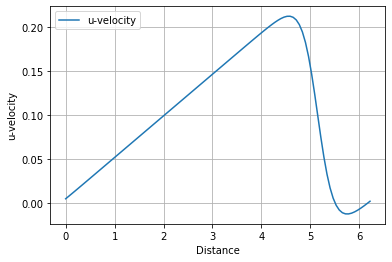

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49. -50. -49. -48. -47. -46. -45.
 -44. -43. -42. -41. -40. -39. -38. -37. -36. -35. -34. -33. -32. -31.
 -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17.
 -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.]


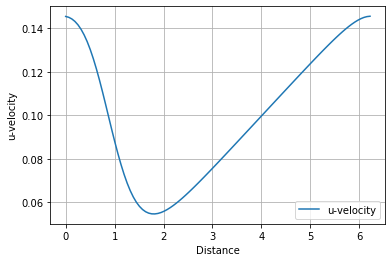

In [6]:
#Bugers equation (As i thought)
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import csv

f = open('Spectral for Burgers.plt', 'w', encoding='utf-8', newline='')
#wr = plt.writer(f)

wave = np.zeros([100],dtype = np.float64)
wave_2 = np.zeros([200],dtype = np.float64)
x = np.zeros([100],dtype = np.float64)
u_old = np.zeros([100],dtype = np.float64)
u_new = np.zeros([100],dtype = np.float64)
U_old = np.zeros([100],dtype = np.complex128)
U_new = np.zeros([100],dtype = np.complex128)
g_old = np.zeros([100],dtype = np.complex128)
G_old = np.zeros([100],dtype = np.complex128)

#Discretization of Basis & Domain N
N = 100
T = 1000
nu = 0.1
Domain = 2.0*np.pi
d_t = 1/100 # delta - time
d_x = Domain/N

#Initial condition (Discretization)
for i in range (N):
    x[i] = i*d_x  
    u_old[i] = np.sin(x[i]) + 0.1
    
    if(i<N//2):
        wave[i] = i   ##wave number
        
    ## N//2 (//는 몫을 의미한다)
    
    elif(i>=N//2):
        wave[i] = i-N
print(wave)   


#print(u_old)    
f.write('VARIABLES = "x", "y" \n')

for t in range(T):
    
    f.write('Zone T= "%d"\n' %t)  
    f.write('I=%d \n' %N)
    
    U_old = np.fft.fft(u_old)  
    G_old = np.fft.fft(u_old**2)

    #Initial condition (Discretization) $ Inverse Fourier
    
    for i in range (N):  
        
        U_new[i] = (1-d_t/2*nu*(wave[i]**2))/(1+d_t/2*nu*(wave[i]**2))*U_old[i] - d_t*2*wave[i]/(1+d_t/2*nu*(2*wave[i]**2))*G_old[i]*1j
         # - time update     
   

     #Inverse Fourier transform
    u_old = np.real(np.fft.ifft(U_new)) #Inverse Fourier transform
    #print(u_old[i])
    
    for k in range(N):
        f.write("%d %f \n" %(k , u_old[k]))
    #U (Frequency domain), u (real domain)  



 #plt.subplots(nrows=2, ncols=1) graph를 1개 이상을 보여주고 싶을때 사용한다
plt.plot(x[0:100],u_old[0:100],label='u-velocity')
#plt.plot(x[0:51],x[0:51],label='x')
plt.legend()
plt.xlabel('Distance'); plt.ylabel('u-velocity'); plt.grid()


f.close()


# range (0, 10, 1) 자체만으로도 문법이 존재하고 해석을 해보면 i가 range 안에서 반복할때 라고 생각하면 됨
# for(i=0;i<10:i++) 범위를 설정해주는 것과 같다 단지 조금 다르게 쓸뿐
#"TypeError 'int' or 'float' object is not callable" It probably means that you are trying to call a method when a property with the same name is available. If this is indeed the problem, the solution is easy. Simply change the method call into a property access.2019. 12. 5.
#"TypeError 'int' or 'float' object is not callable"  
#python에서는 뒤에 ;를 쓸필요가 없다.

#arr[5][1] 
#IndexError: index 5 is out of bounds for axis 0 with size 2 - 배열의 범위를 벗어나면 
